In [31]:
import pandas as pd
import numpy as np

import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.cross_validation import StratifiedKFold , KFold
from sklearn.grid_search import GridSearchCV
import seaborn as sns

In [32]:
# read data

df = pd.read_csv("convetereo.csv",delimiter=',',encoding = "ISO-8859-1")

In [33]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [35]:
df.shape

(10886, 12)

In [36]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [37]:
# show the number and the percentage of missing values in each  columns

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df))
dftype = df.dtypes
missing_data = pd.concat([total, percent,dftype], axis=1, keys=['Total', 'Percent','data type'])
missing_data

,Total,Percent,data type
atemp,0,0.0,float64
casual,0,0.0,int64
count,0,0.0,int64
datetime,0,0.0,object
holiday,0,0.0,int64
humidity,0,0.0,int64
registered,0,0.0,int64
season,0,0.0,int64
temp,0,0.0,float64
weather,0,0.0,int64


count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


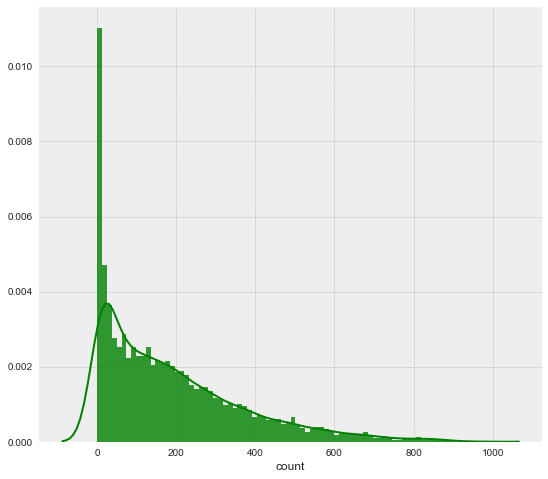

In [38]:
# ALdistribution de la variable cible 'count'
%matplotlib inline

plt.style.use('bmh')

print(df['count'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['count'], color='g', bins=80, hist_kws={'alpha': 0.8});

In [39]:
# seperaer la variable globale 'datetime' aux plusiseurs variable : mois , jour , heure .
from datetime import datetime

df['datetime']=df['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['month']=df['datetime'].apply(lambda x:x.month)
df['hour']=df['datetime'].apply(lambda x:x.hour)
df['day']=df['datetime'].apply(lambda x:x.day)

print (df.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  month  hour  day  
0        81        0.0       3          13     16      1     0    1  
1        80        0.0       8          32     40      1     1    1  
2        80        0.0       5          27     32      1     2    1  
3        75        0.0       3          10     13      1     3    1  
4        75        0.0       0           1      1      1     4    1  


In [40]:
df['dayname'] = df['datetime'].dt.dayofweek + 1


In [41]:
df = df.drop(['datetime'], axis=1)

In [42]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,dayname
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,1,6
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,6
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,1,6
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,1,6
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,1,6


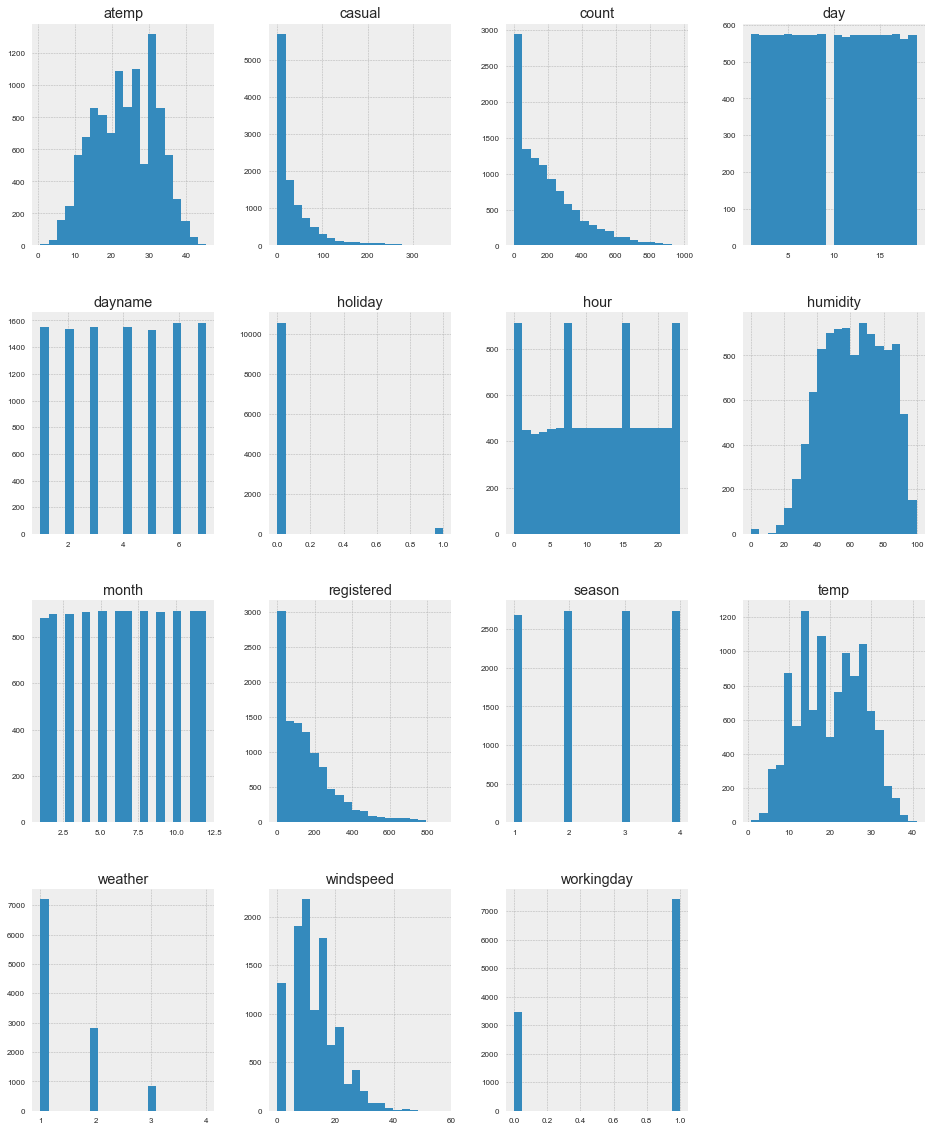

In [43]:
# LAdistribution des variables quantitatives

df_num.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);

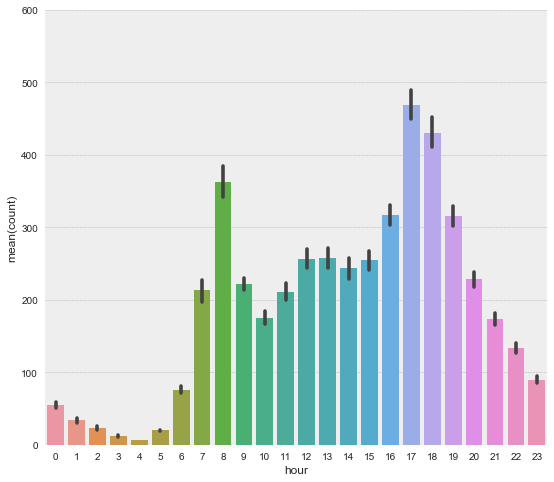

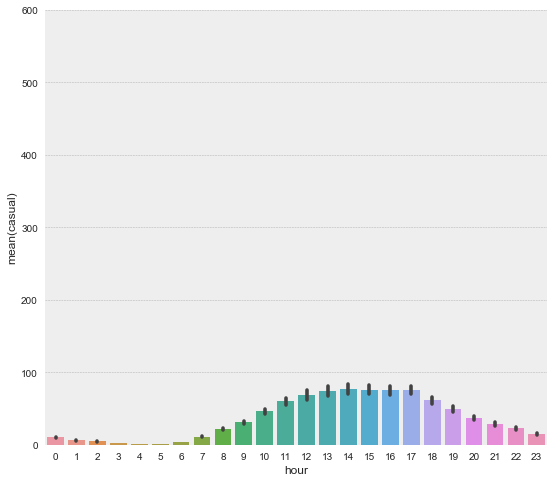

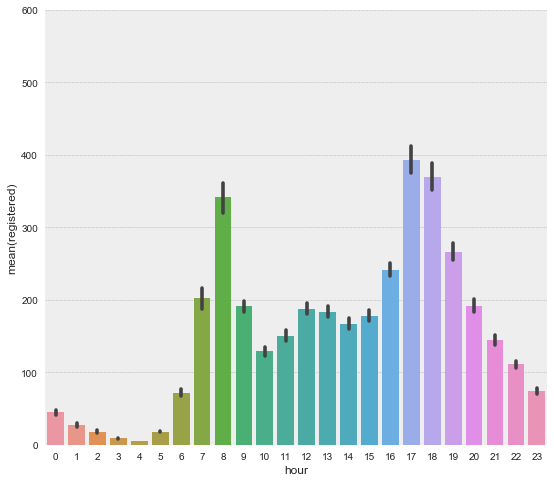

In [44]:



names=['count', 'casual', 'registered']
i=1
for name in names:
    plt.figure(figsize=(9, 8))
    sns.barplot(data=df,y=name,x="hour",orient="v")
    sns.plt.ylim(0, 600)
    i=i+1
    plt.show()



In [45]:
sns.barplot?

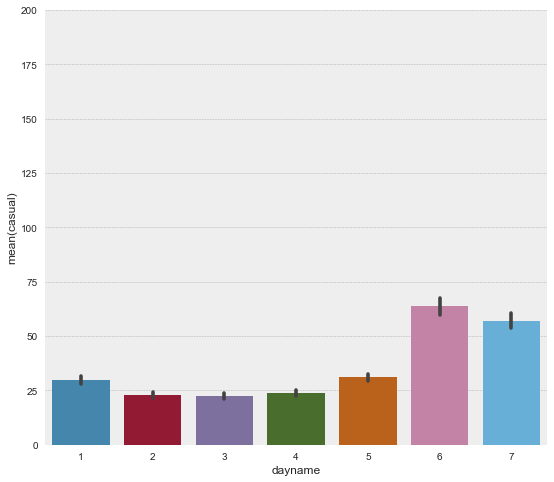

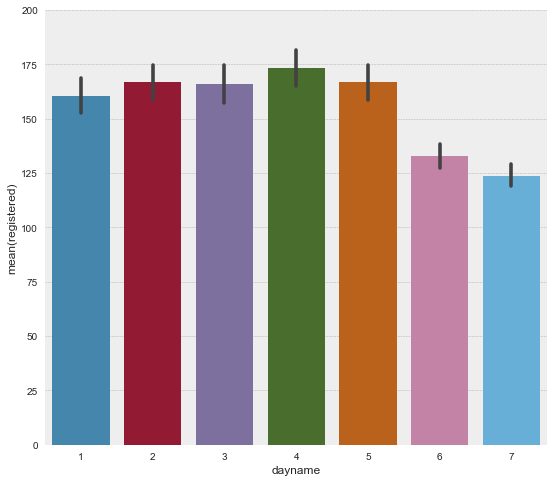

In [47]:



names=[ 'casual', 'registered']
i=1
for name in names:
    plt.figure(figsize=(9, 8))
    sns.barplot(data=df,y=name,x="dayname",orient="v")
    sns.plt.ylim(0, 200)
    i=i+1
    plt.show()

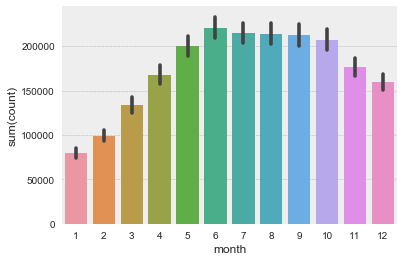

In [76]:
sns.barplot(data=df,y="count",x="month",orient="v" , estimator=sum)

In [ ]:
sns.swarmplot(x='hour',y='count',data=df,hue='season')
plt.show()

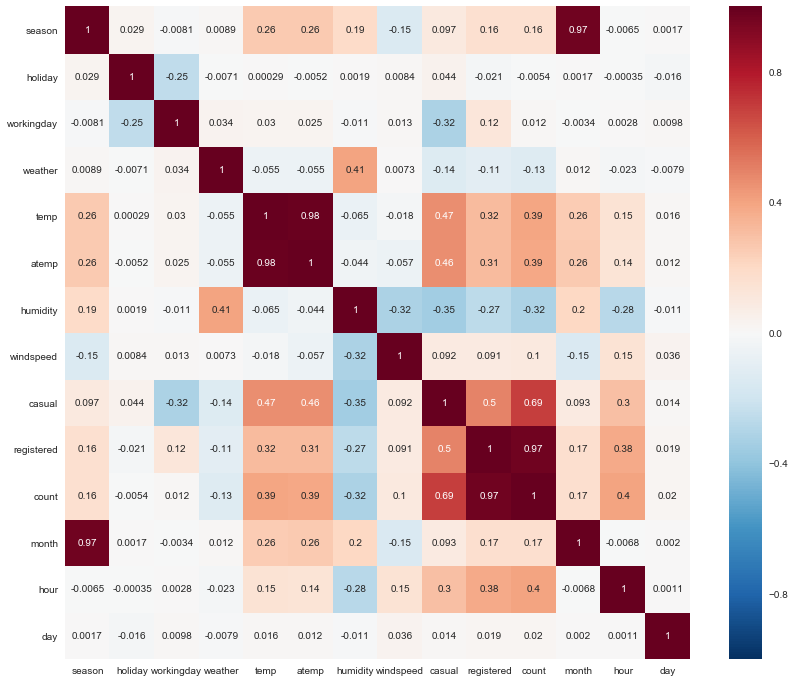

In [34]:
# Lacorrelation entre les varaibles

plt.figure(figsize = (14,12))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [67]:
sns.barplot?

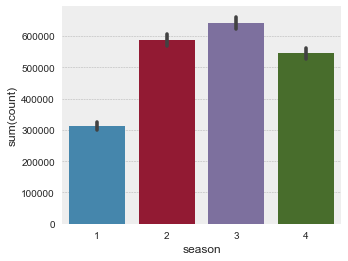

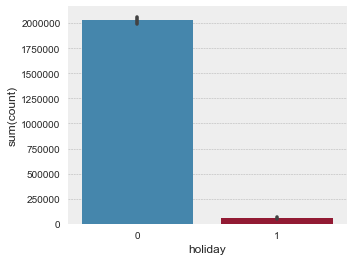

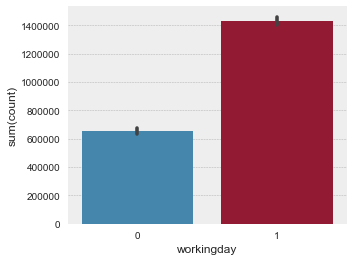

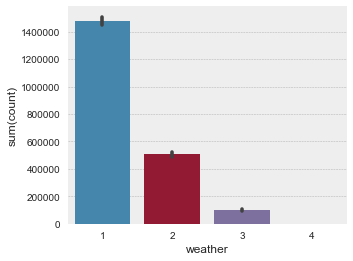

In [75]:
# relation entre la variable cible 'count' et les variables qualitatives : 

categorical_var=['season', 'holiday', 'workingday', 'weather']
i=1
for name in categorical_var:
    plt.figure(figsize=(5, 4))
    sns.barplot(x=name ,y="count",data=df, estimator=sum)  
    i=i+1
    plt.show()

In [15]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

In [16]:
#standardizing data
scaled = StandardScaler().fit_transform(df['count'][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.05210445]
 [-1.05210445]
 [-1.05210445]
 [-1.05210445]
 [-1.05210445]
 [-1.05210445]
 [-1.05210445]
 [-1.05210445]
 [-1.05210445]
 [-1.05210445]]

outer range (high) of the distribution:
[[ 3.8944514 ]
 [ 3.91101352]
 [ 3.91653423]
 [ 4.00486559]
 [ 4.04903127]
 [ 4.14840404]
 [ 4.17600759]
 [ 4.28642178]
 [ 4.2974632 ]
 [ 4.33610817]]


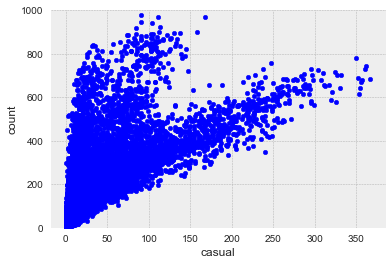

In [26]:
var = 'casual'
data = pd.concat([df['count'], df[var]], axis=1)
data.plot.scatter(x=var, y='count', ylim=(0,1000));

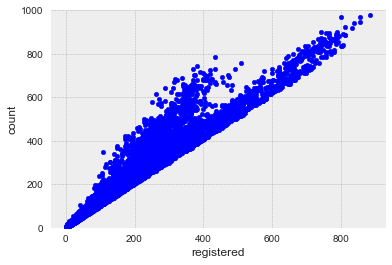

In [27]:
var = 'registered'
data = pd.concat([df['count'], df[var]], axis=1)
data.plot.scatter(x=var, y='count', ylim=(0,1000));

In [77]:
# drop : atemp , holyday , regestered , casual ,season , windspeed en se basant sur la correlation et l'interet de chaques variables

df=df.drop(['atemp','holiday','registered','casual','season','windspeed'], axis=1)
df.head()

,workingday,weather,temp,humidity,count,month,hour,day,dayname
0,0,1,9.84,81,16,1,0,1,6
1,0,1,9.02,80,40,1,1,1,6
2,0,1,9.02,80,32,1,2,1,6
3,0,1,9.84,75,13,1,3,1,6
4,0,1,9.84,75,1,1,4,1,6


In [78]:
# transformer les variables qualitatibves aux variables quantitatives

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

weather_df=pd.get_dummies(df['weather'],prefix='w')
month_df=pd.get_dummies(df['month'],prefix='m',drop_first=True)
hour_df=pd.get_dummies(df['hour'],prefix='h',drop_first=True)


In [79]:

df=df.join(weather_df)
df=df.join(month_df)                     
df=df.join(hour_df)

In [80]:
df.head()

,workingday,weather,temp,humidity,count,month,hour,day,dayname,w_1,...,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23
0,0,1,9.84,81,16,1,0,1,6,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,9.02,80,40,1,1,1,6,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,9.02,80,32,1,2,1,6,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,9.84,75,13,1,3,1,6,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,9.84,75,1,1,4,1,6,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df=df.drop(['workingday','month','hour','weather'],axis=1)
df.head()

,temp,humidity,count,day,w_1,w_2,w_3,w_4,m_2,m_3,...,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23
0,9.84,81,16,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,80,40,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,80,32,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,75,13,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,75,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
Y = df['count']
X = df.drop(['count'], axis=1)

In [83]:
from sklearn.cross_validation import train_test_split , cross_val_score

X_train, X_cv, y_train, y_cv = train_test_split(X , Y, test_size=.20, random_state=42)

In [108]:
predTrain = []
predTest= []

In [111]:
# l'apprentissage du model et le test

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor




dt = DecisionTreeRegressor() 
model =  RandomForestRegressor(n_estimators=200)

SEED = 42 

    # for each iteration, randomly hold out 20% of the data as CV set
np.random.seed(42)
X_train, X_cv, y_train, y_cv = train_test_split(
X, Y, test_size=.20, random_state=SEED)


model.fit(X_train, y_train) #on applique la régression linéaire


preds = model.predict(X_cv)   # on prédit pour les données de validation
predTrain.append(model.predict(X_train))
predTest.append(preds)
#on affiche l'erreur RMSE ainsi que les coefficients du modèle calculés

error = np.sqrt(mean_squared_error(preds, y_cv))
print ('error test : ', error)

error test :  65.6553176599


In [112]:
predTrain = pd.DataFrame(predTrain)
predTrain = predTrain.transpose()

predTest = pd.DataFrame(predTest)
predTest = predTest.transpose()

dt = DecisionTreeRegressor() 
model =  RandomForestRegressor(n_estimators=200)
model.fit(predTrain , y_train)
pre = model.predict(predTest)
error = np.sqrt(mean_squared_error(pre, y_cv))
print(error)

84.128134253


In [60]:
# l'apprentissage du model et le test

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split , cross_val_score

model = Ridge(alpha=0.1)



SEED = 42 

    # for each iteration, randomly hold out 20% of the data as CV set
np.random.seed(42)
X_train, X_cv, y_train, y_cv = train_test_split(
X, Y, test_size=.20, random_state=SEED)


model.fit(X_train, y_train) #on applique la régression linéaire


preds = model.predict(X_cv)   # on prédit pour les données de validation

accuracies=cross_val_score(estimator=model,X=X_train,y=y_train,scoring='r2',cv=5)
print (accuracies)
print (accuracies.mean())

#on affiche l'erreur RMSE ainsi que les coefficients du modèle calculés

error = np.sqrt(mean_squared_error(preds, y_cv))
print ('error test : ', error)

[ 0.58945594  0.65025229  0.63126314  0.64279222  0.64630529]
0.632013774668
error test :  110.643450554
